## The third In-class-exercise (2/28/2023, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [31]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
 
My objective is to gain insight into how people perceive the "oximeter" product, which has become popular for monitoring health during the COVID-19 pandemic. Specifically, I aim to identify the useful features of a particular manufacturer's product by analyzing user reviews using sentiment analysis.

To accomplish this, I will use POS tagging to label each word in the text with its corresponding part of speech, such as nouns, verbs, personal pronouns, adjectives, adverbs, coordinating conjunctions, and interjections. These POS-tagged reviews will be transformed into a numerical matrix, which will be input to a classifier to detect the sentiment expressed in the text.

I will be focusing on the "Zacurate Pro Series 500DL Fingertip Pulse Oximeter" product, and the reviews for this product can be found at this link: https://www.amazon.com/product-reviews/B0BJLCJ2ZP/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews



'''

'\nPlease write you answer here:\n \nMy objective is to gain insight into how people perceive the "oximeter" product, which has become popular for monitoring health during the COVID-19 pandemic. Specifically, I aim to identify the useful features of a particular manufacturer\'s product by analyzing user reviews using sentiment analysis.\n\nTo accomplish this, I will use POS tagging to label each word in the text with its corresponding part of speech, such as nouns, verbs, personal pronouns, adjectives, adverbs, coordinating conjunctions, and interjections. These POS-tagged reviews will be transformed into a numerical matrix, which will be input to a classifier to detect the sentiment expressed in the text.\n\nI will be focusing on the "Zacurate Pro Series 500DL Fingertip Pulse Oximeter" product, and the reviews for this product can be found at this link: https://www.amazon.com/product-reviews/B0BJLCJ2ZP/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews\n\n\n\n'

Question 2 (10 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [34]:
from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd
Headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    'Accept-Language': 'en-US, en;q=0.5'
}

titles = []
text=[]
for pg in range(1,150):
  url = 'https://www.amazon.com/product-reviews/B0BJLCJ2ZP/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews'

  pg = requests.get(url, headers=Headers)
  s = BeautifulSoup(pg.content,'html.parser')
  revw_t = s.find_all('a',class_='review-title-content')
  for i in range(len(revw_t)):
    titles.append(revw_t[i].get_text().strip())
  revw_txt= s.find_all('span',class_='review-text-content')
  for r in range(0,len(revw_txt)):
    text.append(revw_txt[r].get_text().strip()) 
df_reveiw = pd.DataFrame({
    'Title' : titles,
    'Review': text
})
print(f'Shape of the data frame: {df_reveiw.shape}')
df_reveiw

Shape of the data frame: (210, 2)


,Title,Review
0,IPad 12.9”,I am using this as my primary tool for writing...
1,LOVE IT BEEN WANTING ONE FOR A WHILE AND MY UN...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...
2,Lightning Fast M2!!!!,I’ve been an Apple user since the early 90s. I...
3,"Apple fan for years, this doesn’t dissappoint",As always an avid apple fan. Yes it’s expensiv...
4,Exactly what I ordered as described.,I ordered this to replace my last one as it fe...
...,...,...
205,Needs to be recharged daily if you use it a lot.,Another phenomenal product from Apple. Mine di...
206,Works as expected,Happy with this purchase
207,This iPad Pro Is A Jewel,My wife loves it. It’s her go to device. Well...
208,Perfect!,This iPad was perfect! It came in it's origina...


In [35]:
df_reveiw["preprocessed_review"] = df_reveiw['Review'].str.replace('[^\w\s]','')
df_reveiw

C:\Users\19408\AppData\Local\Temp\ipykernel_23272\881110167.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reveiw["preprocessed_review"] = df_reveiw['Review'].str.replace('[^\w\s]','')


,Title,Review,preprocessed_review
0,IPad 12.9”,I am using this as my primary tool for writing...,I am using this as my primary tool for writing...
1,LOVE IT BEEN WANTING ONE FOR A WHILE AND MY UN...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...
2,Lightning Fast M2!!!!,I’ve been an Apple user since the early 90s. I...,Ive been an Apple user since the early 90s Im ...
3,"Apple fan for years, this doesn’t dissappoint",As always an avid apple fan. Yes it’s expensiv...,As always an avid apple fan Yes its expensive ...
4,Exactly what I ordered as described.,I ordered this to replace my last one as it fe...,I ordered this to replace my last one as it fe...
...,...,...,...
205,Needs to be recharged daily if you use it a lot.,Another phenomenal product from Apple. Mine di...,Another phenomenal product from Apple Mine did...
206,Works as expected,Happy with this purchase,Happy with this purchase
207,This iPad Pro Is A Jewel,My wife loves it. It’s her go to device. Well...,My wife loves it Its her go to device Well ri...
208,Perfect!,This iPad was perfect! It came in it's origina...,This iPad was perfect It came in its original ...


In [36]:
# Remove numbers
df_reveiw["preprocessed_review"] = df_reveiw['preprocessed_review'].str.replace('\d+', '')
# remove special characters
import re
df_reveiw["preprocessed_review"] = df_reveiw['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
df_reveiw

C:\Users\19408\AppData\Local\Temp\ipykernel_23272\863792706.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_reveiw["preprocessed_review"] = df_reveiw['preprocessed_review'].str.replace('\d+', '')


,Title,Review,preprocessed_review
0,IPad 12.9”,I am using this as my primary tool for writing...,I am using this as my primary tool for writing...
1,LOVE IT BEEN WANTING ONE FOR A WHILE AND MY UN...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...
2,Lightning Fast M2!!!!,I’ve been an Apple user since the early 90s. I...,Ive been an Apple user since the early s Im su...
3,"Apple fan for years, this doesn’t dissappoint",As always an avid apple fan. Yes it’s expensiv...,As always an avid apple fan Yes its expensive ...
4,Exactly what I ordered as described.,I ordered this to replace my last one as it fe...,I ordered this to replace my last one as it fe...
...,...,...,...
205,Needs to be recharged daily if you use it a lot.,Another phenomenal product from Apple. Mine di...,Another phenomenal product from Apple Mine did...
206,Works as expected,Happy with this purchase,Happy with this purchase
207,This iPad Pro Is A Jewel,My wife loves it. It’s her go to device. Well...,My wife loves it Its her go to device Well ri...
208,Perfect!,This iPad was perfect! It came in it's origina...,This iPad was perfect It came in its original ...


In [37]:
df_reveiw['preprocessed_review'] = df_reveiw['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))
df_reveiw

,Title,Review,preprocessed_review
0,IPad 12.9”,I am using this as my primary tool for writing...,i am using this as my primary tool for writing...
1,LOVE IT BEEN WANTING ONE FOR A WHILE AND MY UN...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...,everyone at work uses an i pad so they dont ha...
2,Lightning Fast M2!!!!,I’ve been an Apple user since the early 90s. I...,ive been an apple user since the early s im su...
3,"Apple fan for years, this doesn’t dissappoint",As always an avid apple fan. Yes it’s expensiv...,as always an avid apple fan yes its expensive ...
4,Exactly what I ordered as described.,I ordered this to replace my last one as it fe...,i ordered this to replace my last one as it fe...
...,...,...,...
205,Needs to be recharged daily if you use it a lot.,Another phenomenal product from Apple. Mine di...,another phenomenal product from apple mine did...
206,Works as expected,Happy with this purchase,happy with this purchase
207,This iPad Pro Is A Jewel,My wife loves it. It’s her go to device. Well...,my wife loves it its her go to device well rig...
208,Perfect!,This iPad was perfect! It came in it's origina...,this ipad was perfect it came in its original ...


In [38]:
import nltk
nltk.download()
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df_reveiw['preprocessed_review'] = df_reveiw['preprocessed_review'].apply( lambda text : " ".join(w for w in text.split() if w not in sw) )
df_reveiw

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


,Title,Review,preprocessed_review
0,IPad 12.9”,I am using this as my primary tool for writing...,using primary tool writing emails news weather...
1,LOVE IT BEEN WANTING ONE FOR A WHILE AND MY UN...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...,everyone work uses pad dont carry around brief...
2,Lightning Fast M2!!!!,I’ve been an Apple user since the early 90s. I...,ive apple user since early im super happy new ...
3,"Apple fan for years, this doesn’t dissappoint",As always an avid apple fan. Yes it’s expensiv...,always avid apple fan yes expensive youre gett...
4,Exactly what I ordered as described.,I ordered this to replace my last one as it fe...,ordered replace last one fell bike ran vehicle...
...,...,...,...
205,Needs to be recharged daily if you use it a lot.,Another phenomenal product from Apple. Mine di...,another phenomenal product apple mine go blank...
206,Works as expected,Happy with this purchase,happy purchase
207,This iPad Pro Is A Jewel,My wife loves it. It’s her go to device. Well...,wife loves go device well right iphone always ...
208,Perfect!,This iPad was perfect! It came in it's origina...,ipad perfect came original box perfect conditi...


In [39]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [40]:
import nltk
nltk.download('omw-1.4')
from textblob import Word
df_reveiw['preprocessed_review'] = df_reveiw['preprocessed_review'].apply( lambda text : " ".join([ Word(i).lemmatize() for i in text.split()]))
df_reveiw

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Title,Review,preprocessed_review
0,IPad 12.9”,I am using this as my primary tool for writing...,using primary tool writing email news weather ...
1,LOVE IT BEEN WANTING ONE FOR A WHILE AND MY UN...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...,everyone work us pad dont carry around briefca...
2,Lightning Fast M2!!!!,I’ve been an Apple user since the early 90s. I...,ive apple user since early im super happy new ...
3,"Apple fan for years, this doesn’t dissappoint",As always an avid apple fan. Yes it’s expensiv...,always avid apple fan yes expensive youre gett...
4,Exactly what I ordered as described.,I ordered this to replace my last one as it fe...,ordered replace last one fell bike ran vehicle...
...,...,...,...
205,Needs to be recharged daily if you use it a lot.,Another phenomenal product from Apple. Mine di...,another phenomenal product apple mine go blank...
206,Works as expected,Happy with this purchase,happy purchase
207,This iPad Pro Is A Jewel,My wife loves it. It’s her go to device. Well...,wife love go device well right iphone always a...
208,Perfect!,This iPad was perfect! It came in it's origina...,ipad perfect came original box perfect conditi...


In [41]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
df_reveiw['tagged_pos'] = df_reveiw['preprocessed_review'].str.split().map(pos_tag)
df_reveiw

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Title,Review,preprocessed_review,tagged_pos
0,IPad 12.9”,I am using this as my primary tool for writing...,using primary tool writing email news weather ...,"[(using, VBG), (primary, JJ), (tool, NN), (wri..."
1,LOVE IT BEEN WANTING ONE FOR A WHILE AND MY UN...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...,everyone work us pad dont carry around briefca...,"[(everyone, NN), (work, NN), (us, PRP), (pad, ..."
2,Lightning Fast M2!!!!,I’ve been an Apple user since the early 90s. I...,ive apple user since early im super happy new ...,"[(ive, JJ), (apple, NN), (user, NN), (since, I..."
3,"Apple fan for years, this doesn’t dissappoint",As always an avid apple fan. Yes it’s expensiv...,always avid apple fan yes expensive youre gett...,"[(always, RB), (avid, RB), (apple, NN), (fan, ..."
4,Exactly what I ordered as described.,I ordered this to replace my last one as it fe...,ordered replace last one fell bike ran vehicle...,"[(ordered, VBN), (replace, VB), (last, JJ), (o..."
...,...,...,...,...
205,Needs to be recharged daily if you use it a lot.,Another phenomenal product from Apple. Mine di...,another phenomenal product apple mine go blank...,"[(another, DT), (phenomenal, JJ), (product, NN..."
206,Works as expected,Happy with this purchase,happy purchase,"[(happy, JJ), (purchase, NN)]"
207,This iPad Pro Is A Jewel,My wife loves it. It’s her go to device. Well...,wife love go device well right iphone always a...,"[(wife, NN), (love, VBD), (go, VB), (device, R..."
208,Perfect!,This iPad was perfect! It came in it's origina...,ipad perfect came original box perfect conditi...,"[(ipad, NN), (perfect, NN), (came, VBD), (orig..."


In [44]:
#Adding count of POS of each row
adjective = []
adverb = []
c_con = []
s_con = []
intj = []
no = []
ve = []
pro = []
pre = []
det= []
def tags(atags):
  for t in atags:
    na= 0
    nad = 0
    ncon= 0
    nsconj = 0
    ninter = 0
    nno = 0
    nve= 0
    nppro= 0
    npredet = 0
    ndet = 0
    for i,j in t:
      if j == 'JJ':
        na =  na + 1
      elif j == 'RB':
        nad = nad + 1
      elif j == 'CC':
        nccon = nccon + 1
      elif j == 'UH':
        ninter = ninter + 1
      elif j == 'NN':
        nno = nno + 1
      elif j == 'VR':
        nve = nve + 1
      elif j == 'PRP':
        nppro = nppro + 1
      elif j == 'PDT':
        npredet = npredet + 1
      elif j == 'DT':
        ndet = ndet + 1
      elif j == 'IN':
        nsconj = nsconj + 1
    
    adjective.append(na)
    adverb.append(nad)
    c_con.append(ncon)
    s_con.append(nsconj)
    intj.append(ninter)
    no.append(nno)
    ve.append(nve)
    pro.append(nppro)
    pre.append(npredet)
    det.append(ndet)
tags(df_reveiw['tagged_pos'])
df_reveiw['num of adj'] = adjective
df_reveiw['num of adverb'] = adverb
df_reveiw['num of conjunction'] = c_con
df_reveiw['num of conjuction'] = s_con
df_reveiw['num of interjection'] = intj
df_reveiw['num of noun'] = no
df_reveiw['num of verb'] = ve
df_reveiw['num of pronoun'] = pro
df_reveiw['nump of predeterminer'] = pre
df_reveiw['num of determiner'] = det

df_reveiw

,Title,Review,preprocessed_review,tagged_pos,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,IPad 12.9”,I am using this as my primary tool for writing...,using primary tool writing email news weather ...,"[(using, VBG), (primary, JJ), (tool, NN), (wri...",19,7,0,1,0,32,0,0,0,0
1,LOVE IT BEEN WANTING ONE FOR A WHILE AND MY UN...,EVERYONE AT WORK USES AN I PAD SO THEY DONT HA...,everyone work us pad dont carry around briefca...,"[(everyone, NN), (work, NN), (us, PRP), (pad, ...",21,3,0,2,0,33,0,2,0,0
2,Lightning Fast M2!!!!,I’ve been an Apple user since the early 90s. I...,ive apple user since early im super happy new ...,"[(ive, JJ), (apple, NN), (user, NN), (since, I...",20,5,0,2,0,27,0,0,0,0
3,"Apple fan for years, this doesn’t dissappoint",As always an avid apple fan. Yes it’s expensiv...,always avid apple fan yes expensive youre gett...,"[(always, RB), (avid, RB), (apple, NN), (fan, ...",6,5,0,0,0,14,0,0,0,1
4,Exactly what I ordered as described.,I ordered this to replace my last one as it fe...,ordered replace last one fell bike ran vehicle...,"[(ordered, VBN), (replace, VB), (last, JJ), (o...",17,6,0,2,0,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Needs to be recharged daily if you use it a lot.,Another phenomenal product from Apple. Mine di...,another phenomenal product apple mine go blank...,"[(another, DT), (phenomenal, JJ), (product, NN...",5,1,0,0,0,10,0,0,0,1
206,Works as expected,Happy with this purchase,happy purchase,"[(happy, JJ), (purchase, NN)]",1,0,0,0,0,1,0,0,0,0
207,This iPad Pro Is A Jewel,My wife loves it. It’s her go to device. Well...,wife love go device well right iphone always a...,"[(wife, NN), (love, VBD), (go, VB), (device, R...",2,5,0,0,0,4,0,0,0,0
208,Perfect!,This iPad was perfect! It came in it's origina...,ipad perfect came original box perfect conditi...,"[(ipad, NN), (perfect, NN), (came, VBD), (orig...",3,0,0,0,0,9,0,0,0,0


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [45]:
# You code here (Please add comments in the code):
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_feat = df_reveiw.select_dtypes(include=num)
print(f'Shape: {num_feat.shape}')
num_feat




Shape: (210, 10)


,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,nump of predeterminer,num of determiner
0,19,7,0,1,0,32,0,0,0,0
1,21,3,0,2,0,33,0,2,0,0
2,20,5,0,2,0,27,0,0,0,0
3,6,5,0,0,0,14,0,0,0,1
4,17,6,0,2,0,15,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
205,5,1,0,0,0,10,0,0,0,1
206,1,0,0,0,0,1,0,0,0,0
207,2,5,0,0,0,4,0,0,0,0
208,3,0,0,0,0,9,0,0,0,0


In [47]:
a = num_feat
b = df_reveiw['preprocessed_review']
print(f'SHAPE of X: {a.shape}')
print(f'SHAPE of Y: {b.shape}')

SHAPE of X: (210, 10)
SHAPE of Y: (210,)


In [48]:
xt, xte, yt, yte = train_test_split(a, b, test_size=0.2, random_state=60)
xt.shape, xte.shape

((168, 10), (42, 10))

<AxesSubplot:>

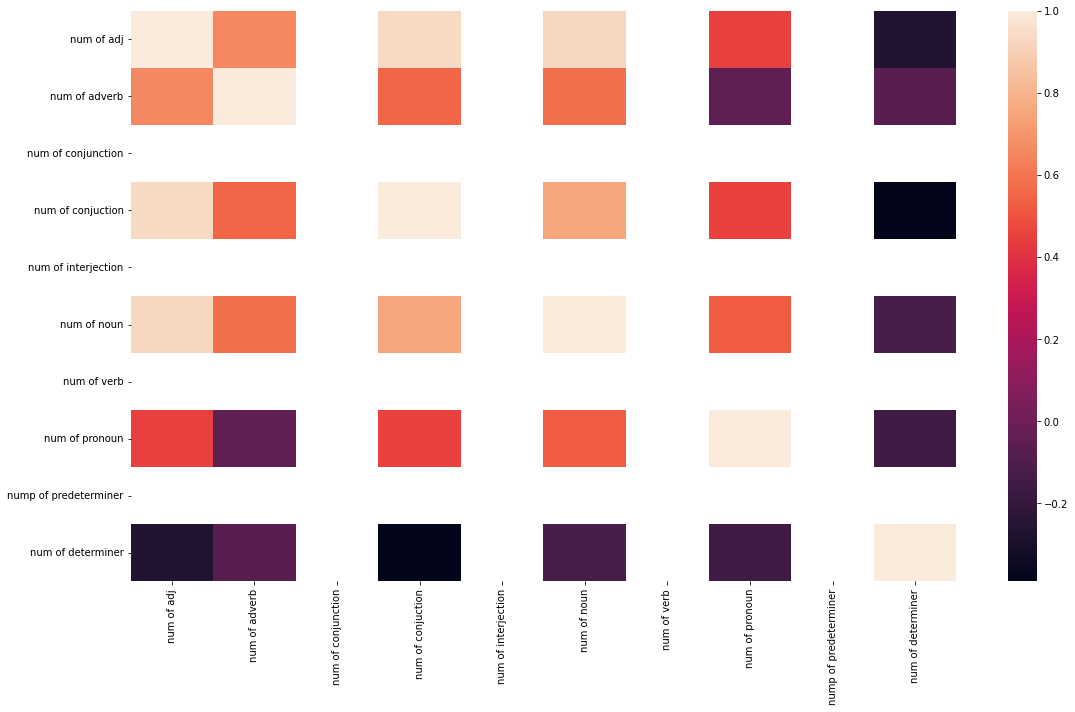

In [49]:
cor = xt.corr()
f, a = plt.subplots()
f.set_size_inches(18.5, 10.5)
sns.heatmap(cor)

In [50]:
def correlated(co, thres):
  col = []
  data = co.corr()
  for r in range(len(data.columns)):
    for c in range(r):
      if (abs(data.iloc[r, c]) > thres):
        col.append(data.columns[r])
  return col


corr = list(set(correlated(xt, 0.5)))
print(f'correlated features are: {set(corr)}')

correlated features are: {'num of adverb', 'num of pronoun', 'num of conjuction', 'num of noun'}


In [51]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=100, max_depth=2)
forest.fit(xt[corr].fillna(0), yt)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=100)

In [52]:
w = pd.concat([pd.Series(corr), pd.Series(forest.feature_importances_)], axis=1)
w.columns = ['columns', 'weight']
w.sort_values(by='weight', ascending=False)

,columns,weight
3,num of noun,0.463134
0,num of adverb,0.321321
1,num of pronoun,0.108368
2,num of conjuction,0.107177


Question 4 (10 points): Write python code to rank the text based on text similarity. Based on the text data you used for question 2, design a query to match the most relevant docments. Please use the BERT model to represent both your query and the text data, then calculate the cosine similarity between the query and each text in your data. Rank the similary with descending order. 

In [54]:
# You code here (Please add comments in the code):
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
model = SentenceTransformer('bert-base-nli-mean-tokens')
q = "Enter the Query input for spam text similarity"
qe = model.encode(q)
document_embeddings = model.encode(df_reveiw['preprocessed_review'].tolist())
similarities = cosine_similarity(qe.reshape(1,-1), document_embeddings).flatten()
similarities

array([0.31347603, 0.20571062, 0.25805578, 0.2761022 , 0.35174683,
       0.30566636, 0.23646918, 0.29721063, 0.46590826, 0.20324764,
       0.31347603, 0.20571062, 0.25805578, 0.2761022 , 0.35174683,
       0.30566636, 0.23646918, 0.29721063, 0.46590826, 0.20324764,
       0.31347603, 0.20571062, 0.25805578, 0.2761022 , 0.35174683,
       0.30566636, 0.23646918, 0.29721063, 0.46590826, 0.20324764,
       0.31347603, 0.20571062, 0.25805578, 0.2761022 , 0.35174683,
       0.30566636, 0.23646922, 0.29721063, 0.46590826, 0.20324764,
       0.31347603, 0.20571062, 0.25805578, 0.2761022 , 0.35174683,
       0.30566636, 0.23646918, 0.29721063, 0.46590826, 0.20324764,
       0.31347603, 0.20571062, 0.25805578, 0.2761022 , 0.35174683,
       0.30566636, 0.23646918, 0.29721063, 0.46590826, 0.20324764,
       0.31347603, 0.20571062, 0.25805578, 0.2761022 , 0.35174683,
       0.30566636, 0.23646918, 0.29721063, 0.46590826, 0.20324764,
       0.31347603, 0.20571062, 0.25805578, 0.2761022 , 0.35174

In [56]:
similarity_raw_data = pd.DataFrame(similarities.T, columns=['similarity'])
similarity_raw_data['document'] = df_reveiw['Title']
similarity_raw_data.sort_values(by='similarity', ascending=False, inplace=True)
print(similarity_raw_data)

     similarity                                           document
68     0.465908                                           Perfect!
178    0.465908                                           Perfect!
108    0.465908                                           Perfect!
98     0.465908                                           Perfect!
118    0.465908                                           Perfect!
..          ...                                                ...
169    0.203248  Great product and arrived very quickly and in ...
89     0.203248  Great product and arrived very quickly and in ...
179    0.203248  Great product and arrived very quickly and in ...
79     0.203248  Great product and arrived very quickly and in ...
209    0.203248  Great product and arrived very quickly and in ...

[210 rows x 2 columns]
